# 11장

In [2]:
import matplotlib
matplotlib.rc('font', family="NanumBarunGothicOTF")  

%matplotlib inline

# 11.1 당뇨병 예측

선형 계수:
[  17.111077     -8.90569116   60.23530619   56.91141325   48.61287984
  -87.6805609   -70.45447017   27.23805421  110.13009401    4.37998229]


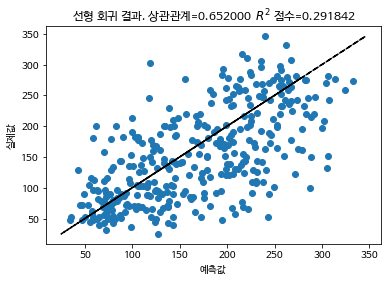

라쏘 계수:
[   9.62307307   -0.           61.16350801   47.10690045   -0.
  -14.20858803  -55.18453612    0.          128.48109079    0.        ]


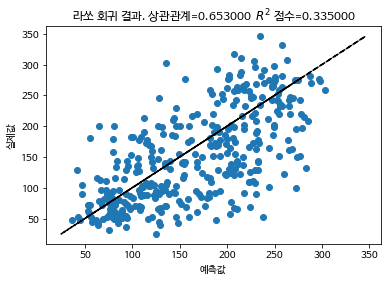

In [4]:
import sklearn.datasets
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score
diabetes = sklearn.datasets.load_diabetes()
X, Y = normalize(diabetes['data']), diabetes['target']
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size=.8)
linear = LinearRegression()
linear.fit(X_train, Y_train)
preds_linear = linear.predict(X_test)
corr_linear = round(pd.Series(preds_linear).corr(
    pd.Series(Y_test)), 3)
rsquared_linear = r2_score(Y_test, preds_linear)
print("선형 계수:")
print(linear.coef_)
plt.scatter(preds_linear, Y_test)
plt.title("선형 회귀 결과. 상관관계=%f  $R^2$ 점수=%f" 
    % (corr_linear, rsquared_linear))
plt.xlabel("예측값")
plt.ylabel("실제값")
# 비교를 위해 x=y 라인 추가
plt.plot(Y_test, Y_test, 'k--')
plt.show()


lasso = Lasso()
lasso.fit(X_train, Y_train)
preds_lasso = lasso.predict(X_test)
corr_lasso = round(pd.Series(preds_lasso).corr(
    pd.Series(Y_test)), 3)
rsquared_lasso = round(
    r2_score(Y_test, preds_lasso), 3)
print("라쏘 계수:")
print(lasso.coef_)
plt.scatter(preds_lasso, Y_test)
plt.title("라쏘 회귀 결과. 상관관계=%f  $R^2$ 점수=%f" 
    % (corr_lasso, rsquared_lasso))
plt.xlabel("예측값")
plt.ylabel("실제값")
# 비교를 위해 x=y 라인 추가
plt.plot(Y_test, Y_test, 'k--')
plt.show()

# 11.2 선형 회귀

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array([[0.0],[1.0],[2.0]])
y = np.array([1.0,2.0,2.9])
lm = LinearRegression().fit(x, y)

In [6]:
lm.coef_

array([ 0.95])

In [7]:
lm.intercept_

1.0166666666666671

# 11.3 커브 피팅

In [8]:
from scipy.optimize import curve_fit
import numpy as np

xs = np.array([1.0, 2.0, 3.0, 4.0])
ys = 2.0 + 3.0 *xs*xs + 0.2*np.random.uniform(3)
def calc(x, a, b):
    return a + b*x*x

cf = curve_fit(calc, xs, ys)
best_fit_params = cf[0]

In [9]:
best_fit_params

array([ 2.41848121,  3.        ])